In [1]:
import numpy as np
import scipy.io

In [2]:
dataset = scipy.io.loadmat(file_name = "ECE661_Fall21_dataset.mat")

In [3]:
type(dataset)

dict

In [4]:
dataset

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Aug 28 21:46:39 2021',
 '__version__': '1.0',
 '__globals__': [],
 'D': array([[ 1.10291617e+01],
        [ 8.70982046e+00],
        [ 5.04958679e+00],
        [ 5.50947236e+00],
        [-1.43807993e+00],
        [-7.34707791e-01],
        [ 2.26485691e+00],
        [ 5.13599021e+00],
        [-8.36686932e-01],
        [ 3.63455668e+00],
        [ 1.20182278e+00],
        [-3.29293459e+00],
        [ 3.71126778e+00],
        [ 5.86339521e+00],
        [ 3.67299462e+00],
        [ 2.67159510e+00],
        [-3.76190772e-01],
        [ 7.38059290e+00],
        [-2.71244490e-01],
        [ 3.66744003e+00],
        [-5.21334958e-01],
        [-3.71716750e+00],
        [ 2.12752522e+00],
        [ 3.04137322e+00],
        [ 4.55543883e-01],
        [ 3.79315269e+00],
        [-2.25987356e+00],
        [-4.14344485e+00],
        [-3.29192681e+00],
        [ 7.74457650e+00],
        [-1.13473702e+01],
        [ 8.2913436

In [5]:
target_D = dataset['D']
data_X = dataset['X']

In [6]:
print(data_X[0].shape)
print(data_X[0].reshape((1,3)).shape)
print(data_X[0].reshape((1,3)).T.shape)
print(data_X[0])
print(data_X[0].reshape((1,3)))
print(data_X[0].reshape((1,3)).T)
print(type(data_X[0].reshape((1,3)).T))

(3,)
(1, 3)
(3, 1)
[ 1.         -1.30663171  2.47541277]
[[ 1.         -1.30663171  2.47541277]]
[[ 1.        ]
 [-1.30663171]
 [ 2.47541277]]
<class 'numpy.ndarray'>


In [7]:
print(type(target_D))
print(type(data_X))
print(target_D[0])
print(target_D[0][0])
print(len(target_D))
print(target_D.shape)
print(data_X.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[11.02916166]
11.029161663493928
100
(100, 1)
(100, 3)


In [8]:
# (a) Least square (Wiener) solution
first_part = np.linalg.inv(np.dot(data_X.T, data_X))
W_star = np.dot(np.dot(first_part, data_X.T), target_D)
print(type(W_star))
print(W_star.shape)
print("The weight matrix of Least Square (Wiener) Solution is (W_star)")
print(W_star)
mse_star = np.dot((target_D - np.dot(data_X, W_star)).T, (target_D - np.dot(data_X, W_star))) / float(2 * len(target_D))
print("The MSE of the whole dataset given W_star is")
print(mse_star[0][0])

<class 'numpy.ndarray'>
(3, 1)
The weight matrix of Least Square (Wiener) Solution is (W_star)
[[ 0.99769073]
 [-2.00001451]
 [ 2.99870453]]
The MSE of the whole dataset given W_star is
6.145138742034196e-05


In [9]:
# (b) Run LMS for 20 epochs with learning rate r = 0.01
W_init = W_star
W_init[0][0] = 0
W_init[1][0] = 0
W_init[2][0] = 0
# print(W_init)

first_part = np.linalg.inv(np.dot(data_X.T, data_X))
W_star = np.dot(np.dot(first_part, data_X.T), target_D)

mse_losses = list()
r = 0.01

def calculate_mse (target_D, data_X, W) :
    mse_loss = np.dot((target_D - np.dot(data_X, W)).T, (target_D - np.dot(data_X, W))) / float(2 * len(target_D))
    return mse_loss[0][0]

for i in range(0, 20) :
    for k in range(0, len(target_D)) :
        if i == 0 :
            if k == 0 :
                W_k = W_init
            else :
                W_k = W_k_plus_one
        else :
            W_k = W_k_plus_one
        
        d_k = target_D[k][0]
        # print(d_k)
        X_k = data_X[k].reshape((1,3)).T
        # print(X_k)
        s_k = np.dot(W_k.T, X_k)
        # print(s_k)
        dL_dWk = (-1) * (d_k - s_k) * X_k
        # print(dL_dWk)
        W_k_plus_one = W_k - r * dL_dWk
        # print(W_k_plus_one)
        
    mse_losses.append(calculate_mse(target_D, data_X, W_k_plus_one))
    # print(calculate_mse(target_D, data_X, W_k_plus_one))
    if i == 19 :
        W_20_Epochs = W_k_plus_one

print("Final weight matrix after 20 epochs is: ")
print(W_20_Epochs)
# print(mse_losses)
print("W_star matrix is: ")
print(W_star)

Final weight matrix after 20 epochs is: 
[[ 0.99761689]
 [-1.99979502]
 [ 2.99898621]]
W_star matrix is: 
[[ 0.99769073]
 [-2.00001451]
 [ 2.99870453]]


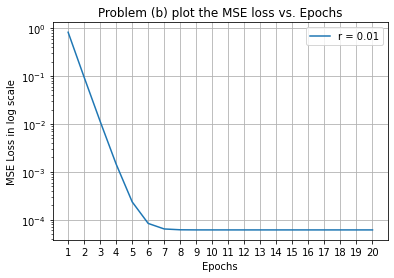

In [10]:
# (b) Plot MSE losses in log scale vs. Epochs
import matplotlib.pyplot as plt
%matplotlib inline

# x_epochs = np.arange(1, 21, 1)
# print(x_epochs)
x_epochs = ['1', '2', '3', '4', '5', 
            '6', '7', '8', '9', '10', 
            '11', '12', '13', '14', '15', 
            '16', '17', '18', '19', '20']
y_mse_losses = mse_losses

figure, axis = plt.subplots()
axis.plot(x_epochs, y_mse_losses, label = "r = 0.01")

axis.set(xlabel = "Epochs", ylabel = "MSE Loss in log scale", 
         title = "Problem (b) plot the MSE loss vs. Epochs")
axis.grid()
plt.yscale("log")
plt.legend()
plt.show()

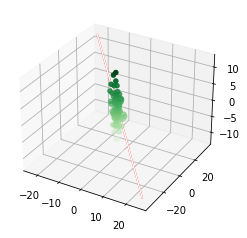

In [11]:
# (c) Scatter plot all 100 data-target pairs in a 3D figure, and
# plot the lines corresponding to the linear models in (a) and (b)
# respectively in the same figure.
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection = '3d')

# plot 100 data-target pairs
zdata = target_D
xdata = data_X[:,1]
ydata = data_X[:,2]
ax.scatter3D(xdata, ydata, zdata, c = zdata, cmap = "Greens")

# plot W_star line in (a), this line has color red
zline = np.linspace(-12, 12, 100)
xline = W_star[1][0] * zline + W_star[0][0]
yline = W_star[2][0] * zline
ax.plot3D(xline, yline, zline, "red")

# plot W_20_Epochs line in (b), this line has color white
zline = np.linspace(-12, 12, 100)
xline = W_20_Epochs[1][0] * zline + W_20_Epochs[0][0]
yline = W_20_Epochs[2][0] * zline
ax.plot3D(xline, yline, zline, "white")

In [12]:
# (c) Given the 3D plot above, linear model from (a) is very close to
# linear model from (b), and both linear models fit the data relatively well.

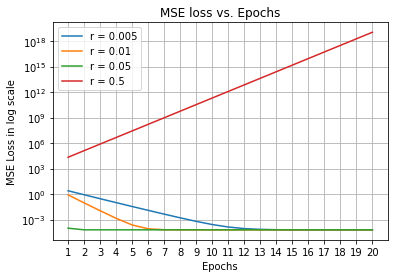

In [13]:
# (d) Multiple learning rates (4 different learning rates)
learning_rates = [0.005, 0.01, 0.05, 0.5]
# print(type(learning_rates))
mse_losses_d = list()

for r in learning_rates :
    for i in range(0, 20) :
        for k in range(0, len(target_D)) :
            if i == 0 :
                if k == 0 :
                    W_k = W_init
                else :
                    W_k = W_k_plus_one
            else :
                W_k = W_k_plus_one
            
            d_k = target_D[k][0]
            X_k = data_X[k].reshape((1,3)).T
            s_k = np.dot(W_k.T, X_k)
            dL_dWk = (-1) * (d_k - s_k) * X_k
            W_k_plus_one = W_k - r * dL_dWk
        mse_losses_d.append(calculate_mse(target_D, data_X, W_k_plus_one))

# print(len(mse_losses_d))
mse_005_losses = mse_losses_d[0:20]
mse_01_losses = mse_losses_d[20:40]
mse_05_losses = mse_losses_d[40:60]
mse_5_losses = mse_losses_d[60:80]

x_epochs = ['1', '2', '3', '4', '5', 
            '6', '7', '8', '9', '10', 
            '11', '12', '13', '14', '15', 
            '16', '17', '18', '19', '20']

figure, axis = plt.subplots()
axis.plot(x_epochs, mse_005_losses, label = "r = 0.005")
axis.plot(x_epochs, mse_01_losses, label = "r = 0.01")
axis.plot(x_epochs, mse_05_losses, label = "r = 0.05")
axis.plot(x_epochs, mse_5_losses, label = "r = 0.5")

axis.set(xlabel = "Epochs", ylabel = "MSE Loss in log scale", 
         title = "MSE loss vs. Epochs")
axis.grid()
plt.yscale("log")
plt.legend()
plt.show()

In [14]:
# (d) Further enlarge learning rate to 1
r = 1
mse_r1_losses = list()
for i in range(0, 20) :
    for k in range(0, len(target_D)) :
        if i == 0 :
            if k == 0 :
                W_k = W_init
            else :
                W_k = W_k_plus_one
        else :
            W_k = W_k_plus_one
        
        d_k = target_D[k][0]
        X_k = data_X[k].reshape((1,3)).T
        s_k = np.dot(W_k.T, X_k)
        dL_dWk = (-1) * (d_k - s_k) * X_k
        W_k_plus_one = W_k - r * dL_dWk
        
    mse_r1_losses.append(calculate_mse(target_D, data_X, W_k_plus_one))
    print("MSE after Epoch " + str(i+1) + ": " + str(mse_r1_losses[i]) )

MSE after Epoch 1: 3.6798545341445733e+31
MSE after Epoch 2: 5.402768778759977e+60
MSE after Epoch 3: 7.932354446216017e+89
MSE after Epoch 4: 1.164629648926877e+119
MSE after Epoch 5: 1.7099112607185237e+148
MSE after Epoch 6: 2.5104946643133094e+177
MSE after Epoch 7: 3.685912599287265e+206
MSE after Epoch 8: 5.411663240200822e+235
MSE after Epoch 9: 7.945413309855397e+264
MSE after Epoch 10: 1.1665469535403863e+294
MSE after Epoch 11: inf
MSE after Epoch 12: inf
MSE after Epoch 13: inf
MSE after Epoch 14: inf
MSE after Epoch 15: inf
MSE after Epoch 16: inf
MSE after Epoch 17: inf
MSE after Epoch 18: inf
MSE after Epoch 19: inf
MSE after Epoch 20: inf


In [15]:
# (d) Comments

# Given learning rate r = 1 and its MSE losses shown above, the MSE loss gradually becomes so large
# that finally leads to numerical difficulty, making the LMS model training fail.

# Based on all 6 observations, if the learning rate is too small, it would take a very long time for model 
# training to achieve convergence (finding the optimal solution), although the model accuracy could be relatively good.
# Although increasing the learning rate could speed up model training, if the learning rate is too large,
# then the model training might fail (training loss becomes so large that the model fails to converge), which means
# the model accuracy would be really bad.
# Therefore, it is very important to maintain the trade-off between a small learning rate and 
# a large learning rate, through either empirical knowledge or many experiments.